In [8]:
import orbipy as op
import numpy as np
import pandas as pd
from numba.core.ir import Raise
from numba.np.arrayobj import np_array
from orbipy import plotter
from orbipy.correction import border_correction, base_correction
from scipy.optimize import bisect
from matplotlib import pyplot as plt
import pickle


ModuleNotFoundError: No module named 'orbipy.correction'

In [20]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
zero_state = model.get_zero_state()
# zero_state[[0, 4]] = hls[-500][[0, 4]]
model.R

np.float64(384400.0)

In [21]:
one_thousand_kms = (1-model.L1)/58

In [22]:
zero_state = model.get_zero_state()
zero_state[0] = model.L1 - 2 * one_thousand_kms
zero_state[2] = 3 * one_thousand_kms
zero_state[4] = 50000/model.R

In [23]:
left = op.eventX(model.L1 - 10 * one_thousand_kms)
right = op.eventX(model.L1 + 10 * one_thousand_kms)
correction = op.border_correction(model, op.y_direction(), left, right)
impulse_correction = op.simple_station_keeping(model, correction, correction, 2*np.pi)

In [26]:
df = impulse_correction.prop(0, zero_state, 10)

Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 


In [55]:
zero_state

array([0.83125368, 0.        , 0.04218658, 0.        , 0.07618973,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        ])

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


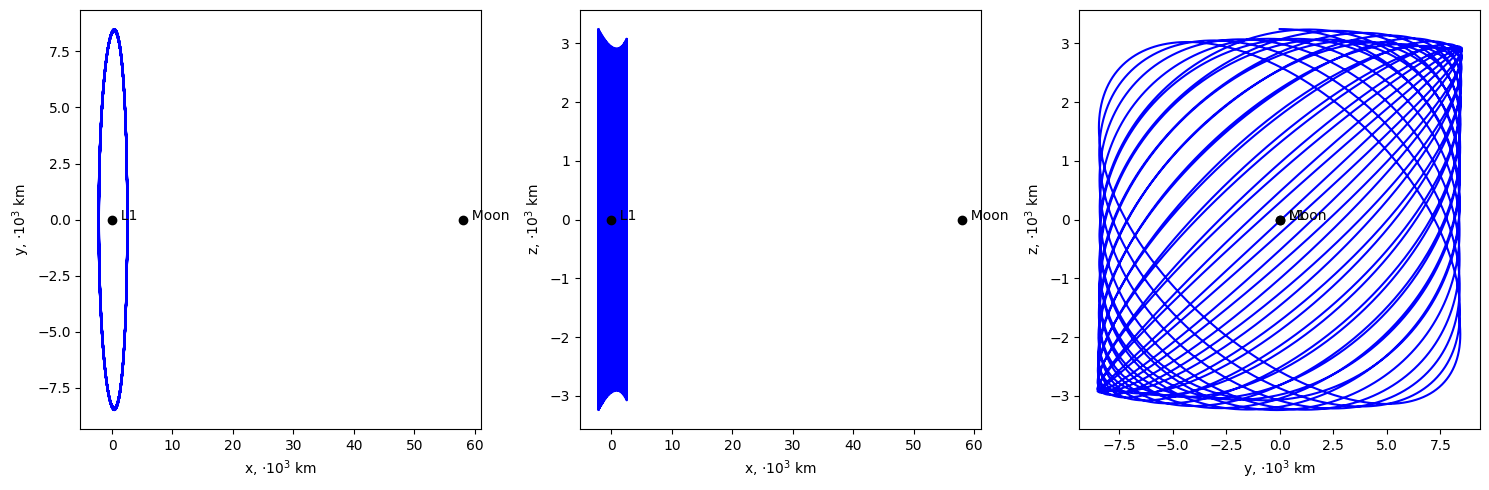

In [28]:
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df, centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.m, plotter.L1], colors='k',ls='',marker='o')

In [38]:
model.L1

np.float64(0.8368785595384785)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


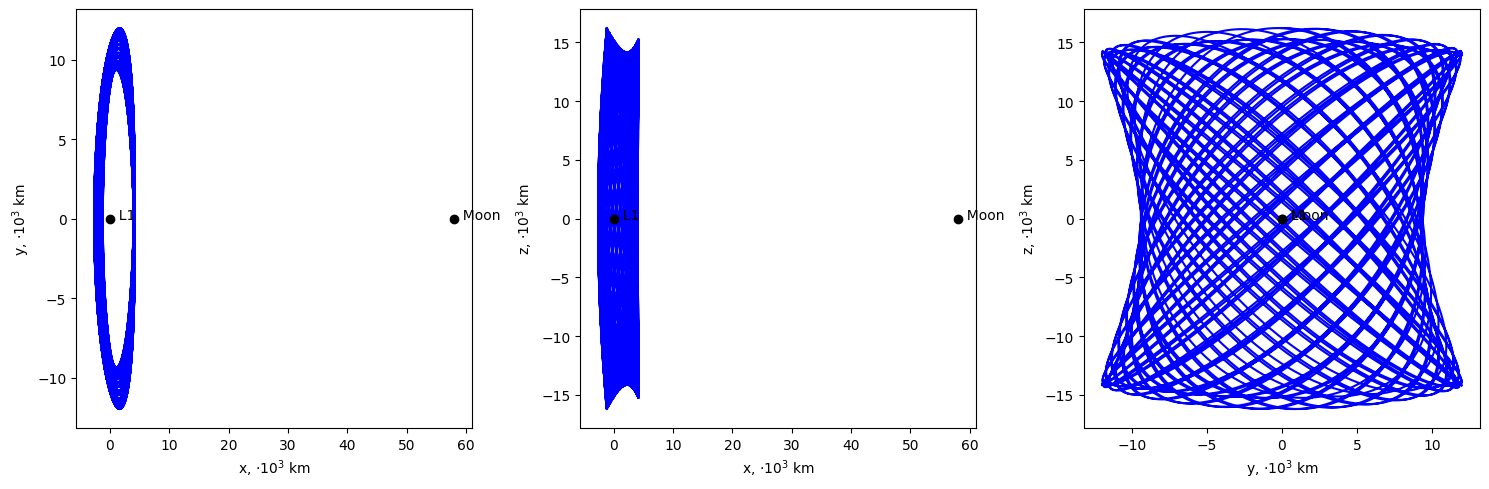

In [73]:
df = pd.read_csv(f'data/orbits/1/orbit_0.8337536277288707_0.042186579429703844_0.05365660214819832.csv')
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df, centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.m, plotter.L1], colors='k',ls='',marker='o')

In [4]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
one_thousand_kms = (1-model.L1) / 61.350

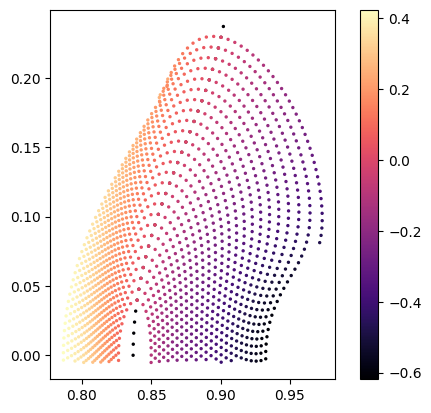

In [2]:

data_zvl = np.load('data/contour_points/zvl/zvl_2.npy')
data_zvl = np.c_[data_zvl, np.zeros(len(data_zvl))]

with open(r"data/contour_points/contour_points_data_5_points.pickle", "rb") as input_file:
    data = pickle.load(input_file)
data_points = []
for line in data:
    for point in line:
        data_points.append(point)
        
data_points = np.array(data_points)

# print(data_points)
plt.scatter(data_zvl[:32,0], data_zvl[:32,1], c=data_zvl[:32,2], cmap='magma', s=2)
plt.scatter(data_points[:,0], data_points[:,1], c=data_points[:,2], cmap='magma', s=2)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

In [6]:
class zero_correction(op.corrections.base_correction):
    def __init__(self, model, direction):
        super().__init__(model, direction)
        
    def calc_dv(self, t, s):
        return model.get_zero_state()
        

Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 
3.1964612594145363


/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


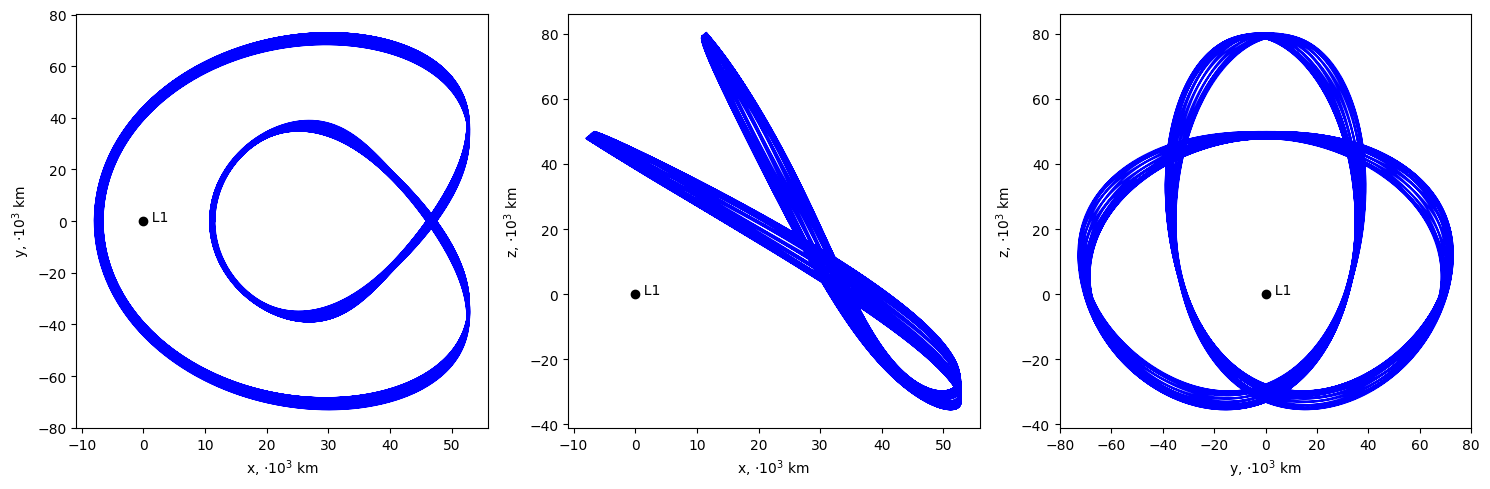

In [36]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
one_thousand_kms = (1-model.L1)/58


left = op.eventX(model.L1 - 33 * one_thousand_kms)
right = op.eventX(model.L1 + 53 * one_thousand_kms)
event = op.eventY(count=3)

correction = op.border_correction(model, op.unstable_direction(model), [left], [right])
zcorrection = zero_correction(model, op.unstable_direction(model))
impulse_correction = op.simple_station_keeping(model, zcorrection, correction, rev=3.1964612594176955/4, events=[event])

s0 = model.get_zero_state()

# i, j = 48, 1
# s0[0] = data[i][j][0]
# s0[2] = data[i][j][1]
# s0[4] = data[i][j][2]

i, j = 51, 8
s0[0] = data[i][j][0]
s0[2] = data[i][j][1]
s0[4] = data[i][j][2]

df = impulse_correction.prop(0, s0, 160)
time = impulse_correction.evout[:3,3]
period = (time[-1] - time[-2])*2
print(period)

plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df, centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.L1], colors='k',ls='',marker='o')

In [37]:
df.to_csv("quasi-periodic-weird-dataframe-1.csv")

In [21]:
np.savetxt("initial-state-weird.txt", s0)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


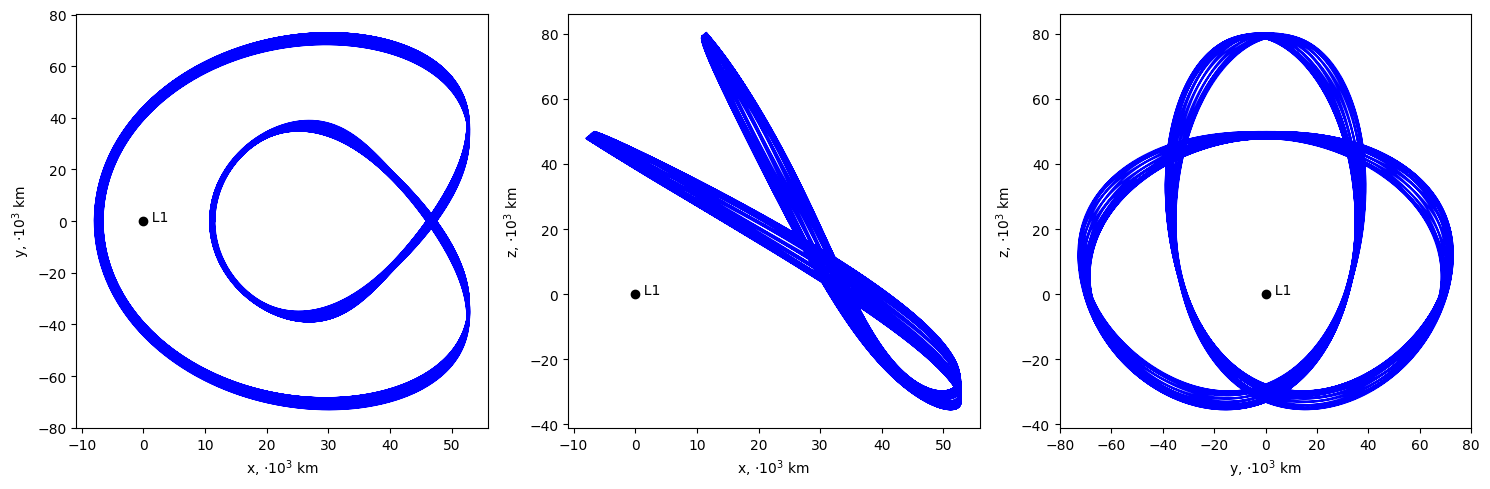

In [44]:
data = pd.read_csv("quasi-periodic-weird-dataframe-1.csv")
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(data, centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.L1], colors='k',ls='',marker='o')

In [51]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
one_thousand_kms = (1-model.L1)/58

zvl = np.load('data/contour_points/zvl/zvl_3.npy')

left = op.eventX(model.L1 - 33 * one_thousand_kms)
right = op.eventX(model.L1 + 53 * one_thousand_kms)

correction = op.border_correction(model, op.unstable_direction(model), [left], [right])
zcorrection = zero_correction(model, op.unstable_direction(model))
impulse_correction = op.simple_station_keeping(model, zcorrection, correction, rev=np.pi/4, events=[event])

s0 = model.get_zero_state()

i = 50
s0[0] = zvl[i][0]
s0[2] = zvl[i][1]
s0[4] = 0


df = impulse_correction.prop(0, s0, 50)


plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df, centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.L1], colors='k',ls='',marker='o')

Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 

ValueError: f(a) and f(b) must have different signs

In [1]:
import pickle
import numpy as np
from instruments import instruments

/tmp/ipykernel_515690/196529938.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  instruments.icm_contour_visualizer(data).show()


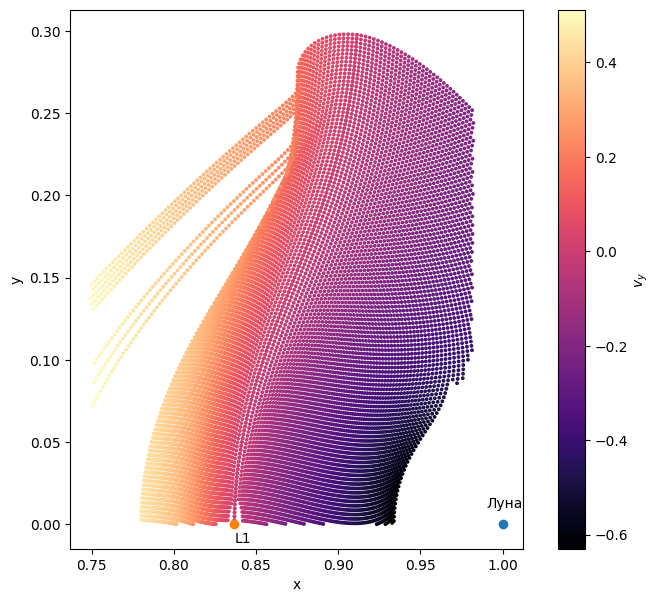

/tmp/ipykernel_515690/487254290.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  instruments.icm_contour_visualizer(filtered_icm_points).show()


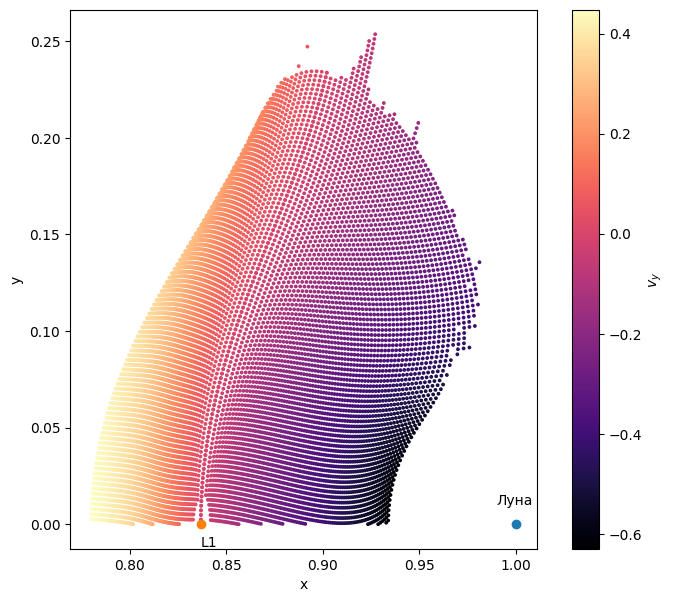

In [11]:
with open(r"data/contour_points/sumdv_maps/vcsm_contour_data_planes.pickle", "rb") as input_file:
    vcsm_data = pickle.load(input_file)

with open(r"data/contour_points/icm_contour_data_planes.pickle", "rb") as input_file:
    icm_data = pickle.load(input_file)[:229] # :229 due to the fact that i did the vcsm check selectively and not for all points

filtered_icm_points = instruments.apply_vcsm_filter_to_ism_data(vcsm_data, icm_data)

instruments.ism_contour_visualizer(filtered_icm_points).show()

/tmp/ipykernel_515690/3946294043.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  instruments.icm_contour_comparison(data, filtered_icm_points, "Метод вращения", "Метод плоскостей").show()


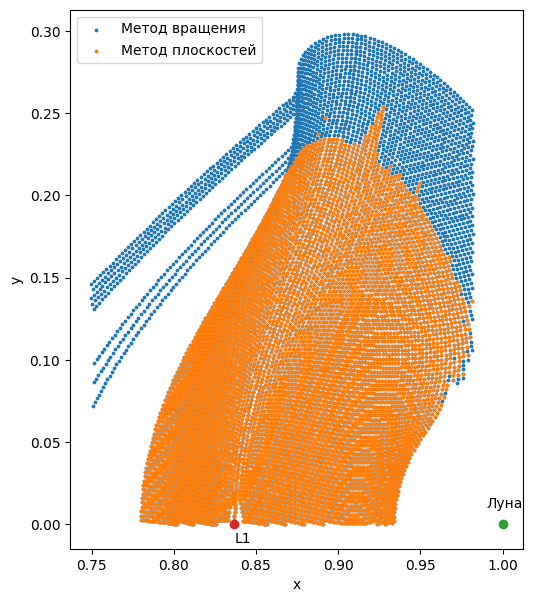

In [10]:
instruments.ism_contour_comparison(data, filtered_icm_points, "Метод вращения", "Метод плоскостей").show()

In [96]:
import orbipy as op

class zero_correction(op.corrections.base_correction):
    def __init__(self, model, direction):
        super().__init__(model, direction)

    def calc_dv(self, t, s):
        return model.get_zero_state()


model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
one_thousand_kms = (1 - model.L1) / 58

left = op.eventX(model.L1 - 33 * one_thousand_kms)
right = op.eventX(model.L1 + 53 * one_thousand_kms)

correction = op.border_correction(model, op.unstable_direction(model), [left], [right])
zcorrection = zero_correction(model, op.unstable_direction(model))
impulse_correction = op.simple_station_keeping(model, zcorrection, correction, rev=np.pi/4)

s0 = model.get_zero_state()

i, j = 218, 20
s0[0] = data[i][j][0]
s0[2] = data[i][j][1]
s0[4] = data[i][j][2]

print(s0)

df = impulse_correction.prop(0, s0, 80)

[ 0.94834008  0.          0.21991326  0.         -0.15432077  0.
  1.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.          1.        ]
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 


/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


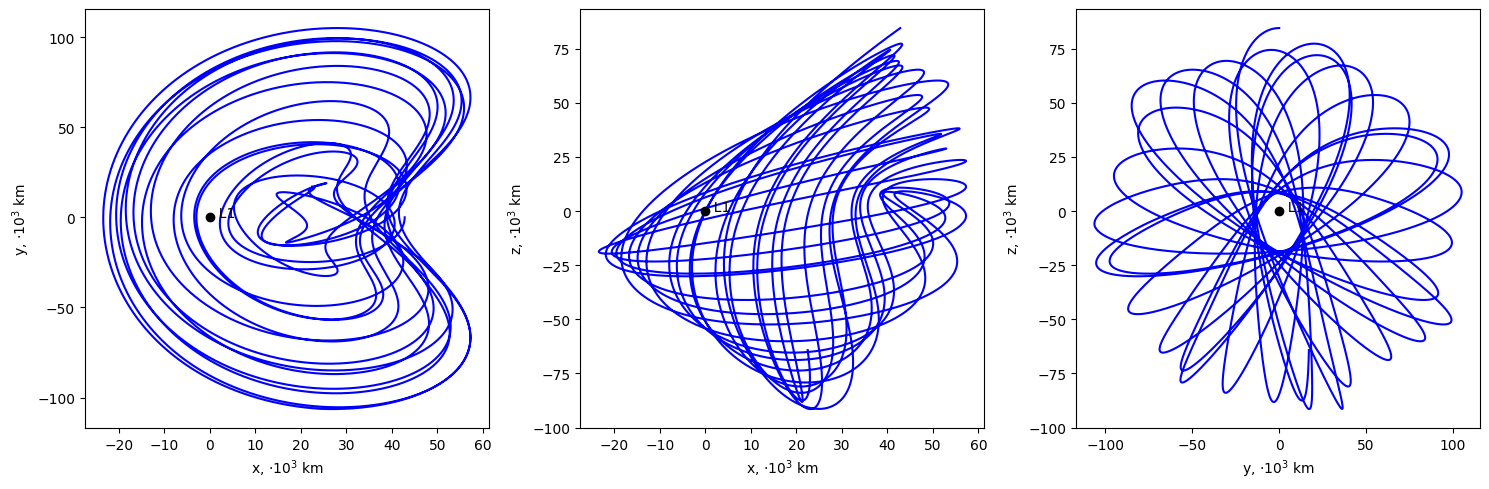

In [97]:
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df[:], centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x': model.L1}, plottables=[plotter.L1], colors='k', ls='', marker='o')

/tmp/ipykernel_515690/1190263420.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  instruments.icm_contour_visualizer(filtered_icm_points).show()


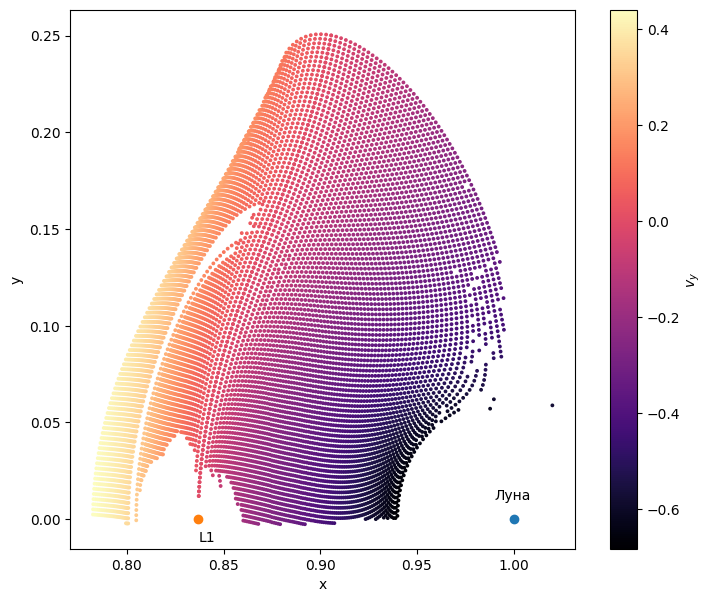

In [113]:
with open(r"data/contour_points/sumdv_maps/vcsm_contour_data_spl.pickle", "rb") as input_file:
    vcsm_data = pickle.load(input_file)

with open(r"data/contour_points/contour_points_data_spl_5.pickle", "rb") as input_file:
    icm_data = pickle.load(input_file)

filtered_icm_points = instruments.apply_vcsm_filter_to_ism_data(vcsm_data, icm_data)

instruments.ism_contour_visualizer(filtered_icm_points).show()

# 0.94834008  0.          0.21991326  0.         -0.15432077

In [98]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
one_thousand_kms = (1 - model.L1) / 58

cj = model.jacobi(s0)
left = op.eventSPL(model, cj, accurate=False) # left side of the half of the horizontal lyapunov orbit
right = op.eventSPL(model, cj, accurate=False, left=False) # right side
correction = op.border_correction(model, op.y_direction(), left, right, dv0=0.03, maxt=1000.)

zcorrection = zero_correction(model, op.unstable_direction(model))
impulse_correction = op.simple_station_keeping(model, zcorrection, correction, rev=np.pi/4)

print(s0)

df = impulse_correction.prop(0, s0, 80)

[ 0.94834008  0.          0.21991326  0.         -0.15432077  0.
  1.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.          1.        ]
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 


/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


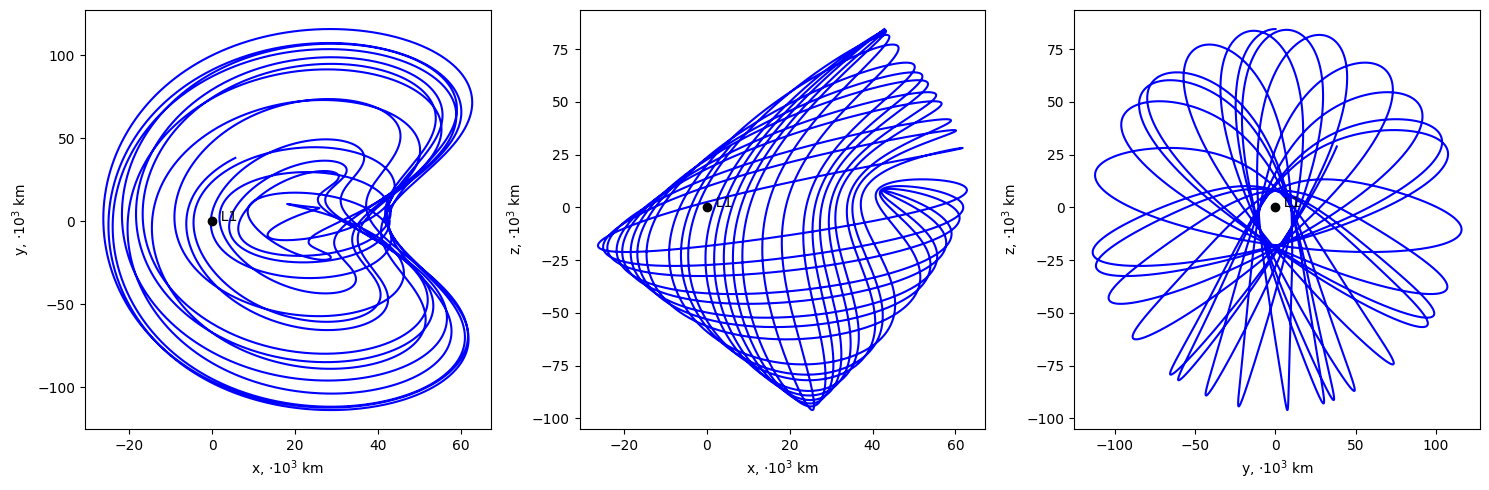

In [112]:
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df[:], centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x': model.L1}, plottables=[plotter.L1], colors='k', ls='', marker='o')

In [120]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
one_thousand_kms = (1 - model.L1) / 58


s0 = model.get_zero_state()

i, j = 204, 66
s0[0] = filtered_icm_points[i][j][0]
s0[2] = filtered_icm_points[i][j][1]
s0[4] = filtered_icm_points[i][j][2]

cj = model.jacobi(s0)
left = op.eventSPL(model, cj, accurate=False) # left side of the half of the horizontal lyapunov orbit
right = op.eventSPL(model, cj, accurate=False, left=False) # right side
correction = op.border_correction(model, op.y_direction(), left, right, dv0=0.03, maxt=1000.)

zcorrection = zero_correction(model, op.unstable_direction(model))
impulse_correction = op.simple_station_keeping(model, zcorrection, correction, rev=np.pi/4)

print(s0)

df = impulse_correction.prop(0, s0, 19)

[ 0.99495643  0.          0.0979252   0.         -0.44300965  0.
  1.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.          1.        ]
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 


/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


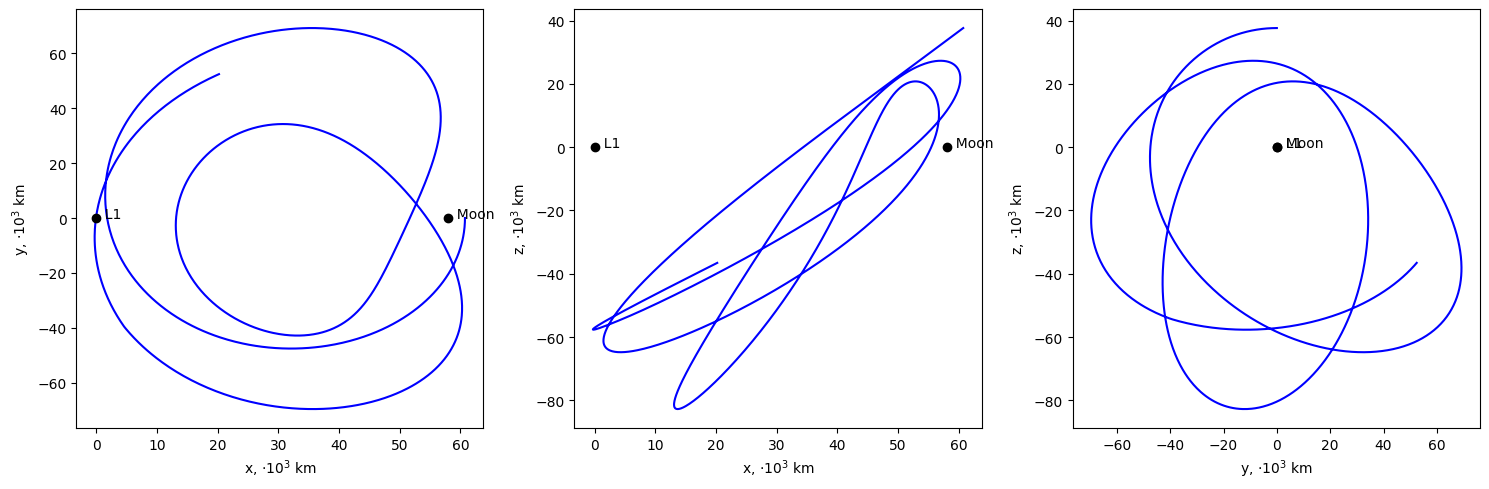

In [123]:
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df[:2000], centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x': model.L1}, plottables=[plotter.L1, plotter.m], colors='k', ls='', marker='o')

In [7]:
import numpy as np
zvl = np.load('data/contour_points/zvl/zvl_4_sparse.npy')
for i in range(len(zvl)):
    print(i, zvl[i])


0 [0.83687856 0.        ]
1 [0.83688915 0.00239295]
2 [0.8369209  0.00478571]
3 [0.83697379 0.0071781 ]
4 [0.83704781 0.00956993]
5 [0.83714291 0.01196101]
6 [0.83725902 0.01435116]
7 [0.8373961  0.01674021]
8 [0.83755407 0.01912796]
9 [0.83773283 0.02151425]
10 [0.83793228 0.02389889]
11 [0.83815232 0.02628173]
12 [0.83839283 0.02866258]
13 [0.83865367 0.0310413 ]
14 [0.83893469 0.03341771]
15 [0.83923575 0.03579167]
16 [0.83955667 0.03816303]
17 [0.83989727 0.04053164]
18 [0.84025737 0.04289736]
19 [0.84063676 0.04526007]
20 [0.84103525 0.04761963]
21 [0.84145259 0.04997593]
22 [0.84188857 0.05232886]
23 [0.84234294 0.0546783 ]
24 [0.84281544 0.05702416]
25 [0.84330582 0.05936635]
26 [0.8438138  0.06170478]
27 [0.84433911 0.06403939]
28 [0.84488144 0.0663701 ]
29 [0.84544049 0.06869686]
30 [0.84601596 0.07101961]
31 [0.84660751 0.07333831]
32 [0.84721483 0.07565294]
33 [0.84783757 0.07796346]
34 [0.84847538 0.08026987]
35 [0.84912791 0.08257216]
36 [0.84979479 0.08487034]
37 [0.85047

[[0.8410352455838301, 0.04761963313000115, 0.0], [0.8434979694728455, 0.046617355505173715, -0.020425270995770805], [0.8453613393883462, 0.044720668406898485, -0.03691914067947372], [0.8467654728512231, 0.04246279803657467, -0.05010229523327405], [0.8478667628252604, 0.040042729900376495, -0.06100367929913943], [0.848757757249354, 0.03753759550737658, -0.0702594975033525], [0.8494936861591639, 0.03498260469908337, -0.07825275533260566], [0.8501097385980155, 0.03239609183746028, -0.08522649042285088], [0.8506297251551496, 0.02978856746151349, -0.0913433555684702], [0.8510705495799947, 0.027166498961794863, -0.09671706031809954]]
[[0.8414525907873709, 0.049975932628851485, 0.0], [0.8439235363510394, 0.048994098930029074, -0.02040133885355723], [0.8458219044445776, 0.047132441611349496, -0.03712953707908645], [0.8472652126990439, 0.04489940988892672, -0.05063112952466174], [0.8484025579961316, 0.04249607573281169, -0.061863381650942614], [0.8493256975408553, 0.040002607711816796, -0.07144

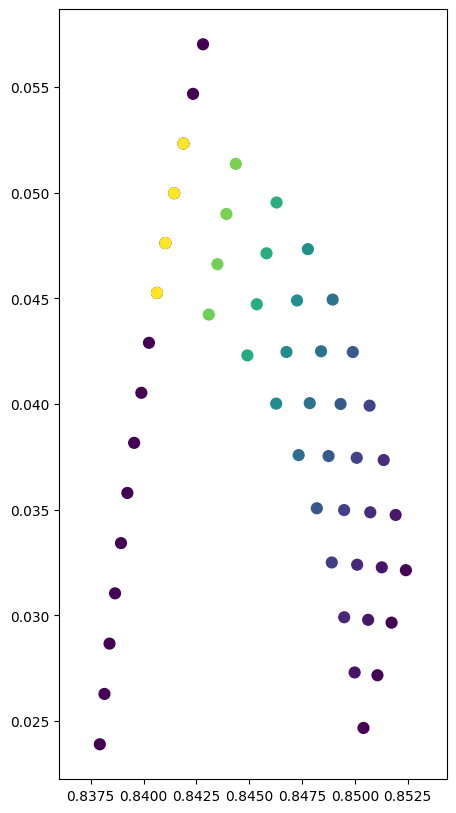

In [56]:
import numpy as np
import matplotlib.pyplot as plt

zvl = np.load('data/contour_points/zvl/zvl_4_sparse.npy')[10:25]
plt.figure(figsize=(5, 10))
plt.axis('equal')

import pickle
with open(r"data/contour_points/icm_contour_data_planes.pickle", "rb") as input_file:
    data = pickle.load(input_file)[40][:10]
print(data)
data = np.array(data)
plt.scatter(zvl[:, 0], zvl[:, 1], c=np.zeros_like(zvl[:,1]), s=60)
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=60)

with open(r"data/contour_points/icm_contour_data_planes.pickle", "rb") as input_file:
    data = pickle.load(input_file)[42][:10]
print(data)
data = np.array(data)
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=60)

with open(r"data/contour_points/icm_contour_data_planes.pickle", "rb") as input_file:
    data = pickle.load(input_file)[44][:10]
print(data)
data = np.array(data)
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=60)

with open(r"data/contour_points/icm_contour_data_planes.pickle", "rb") as input_file:
    data = pickle.load(input_file)[38][:10]
print(data)
data = np.array(data)
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=60)
# plt.colorbar()

In [ ]:
|